King County Houses - EDA and recommendations to stakeholder

#Jennifer Montgomery	Buyer	High budget, wants to show off, timing within a month, waterfront, renovated, high grades year

#H1 Jennifer wants to show off, so she should be aiming for something more rare

#H2 Waterfront houses are rare and sell for more

#H3 Renovated houses are not rare but sell for more

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [5]:
df = pd.read_csv(r"data\kc_house_data.csv")

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.info() # no NaN values, mix of categorical and value columns + geographical (16-18) + date (1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df["waterfront"].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [12]:
df["grade"].value_counts().sort_index()

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: count, dtype: int64

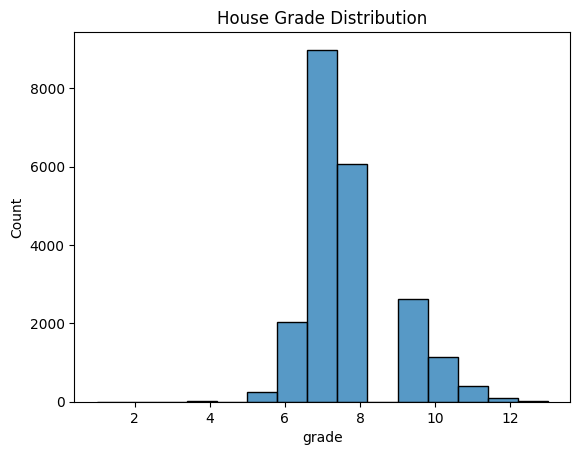

In [13]:
sns.histplot(df['grade'], bins=15)
plt.title("House Grade Distribution")
plt.show()

In [14]:
# Houses with a grad of 10 and higher are more rare, so she can aim to buy these

<Axes: xlabel='grade', ylabel='price'>

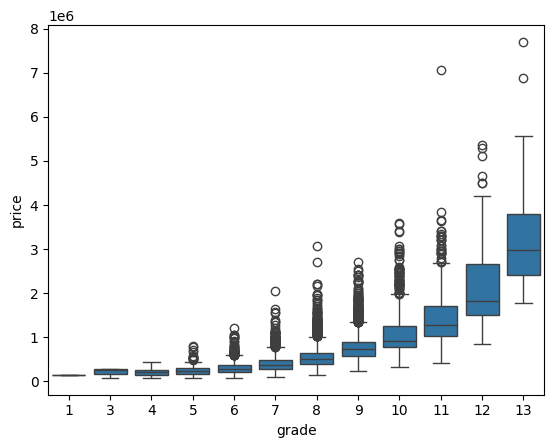

In [15]:
sns.boxplot(x='grade', y='price', data=df)

<Axes: xlabel='sqft_living', ylabel='price'>

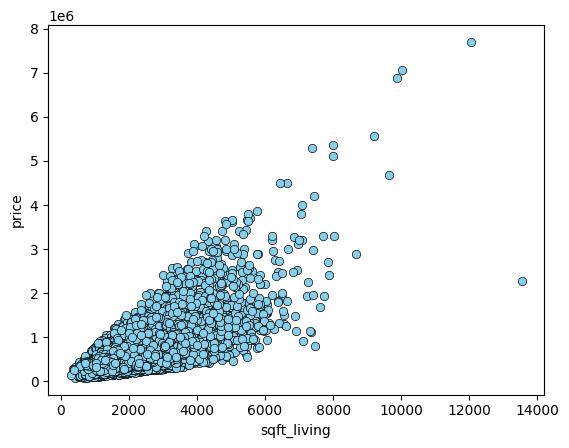

In [16]:
sns.scatterplot(x='sqft_living', y='price', data=df, color="skyblue", edgecolor="black")

In [17]:
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [18]:
df['waterfront'].value_counts(normalize=True)


waterfront
0    0.992458
1    0.007542
Name: proportion, dtype: float64

In [19]:
df[df['waterfront'] == 1]['grade'].value_counts().sort_index()


grade
5      4
6     12
7     23
8     40
9     25
10    28
11    20
12    11
Name: count, dtype: int64

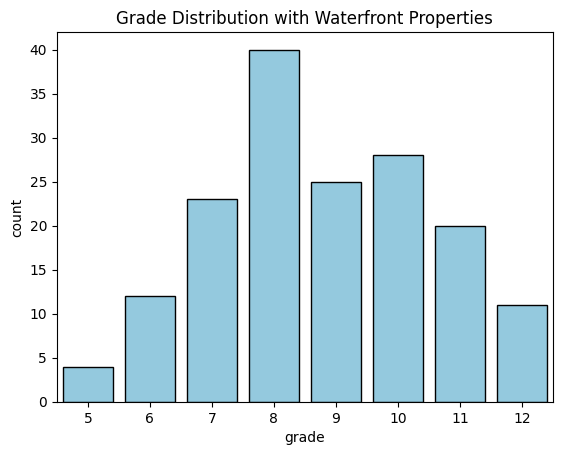

In [20]:
sns.countplot(data=df[df['waterfront'] == 1], x='grade', color="skyblue", edgecolor="black")
plt.title('Grade Distribution with Waterfront Properties')
plt.show()


In [21]:
df_filtered = df[(df['waterfront'] == 1) & (df['grade'] >= 10)]
df_filtered[['id', 'price', 'grade', 'sqft_living', 'zipcode']]


,id,price,grade,sqft_living,zipcode
300,3225069065,3075000.0,10,4550,98074
540,622049114,2125000.0,12,5403,98166
1164,1247600105,5110800.0,12,8010,98033
1315,7558700030,5300000.0,12,7390,98040
1420,8073000550,1700000.0,10,3190,98178
2085,8106100105,3850000.0,11,5770,98040
2179,3343301920,1650000.0,10,2690,98006
2444,7524900003,3278000.0,11,6840,98008
2626,7738500731,4500000.0,12,6640,98155
2864,4114601570,3600000.0,10,5020,98144


In [98]:
df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0).value_counts(normalize=True)


yr_renovated
0    0.957711
1    0.042289
Name: proportion, dtype: float64

In [27]:

df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [ ]:

df.groupby('zipcode')['price'].median().sort_values(ascending=False)    # Median price per zipcode

In [28]:

# Additional column for e.g. top10-zipcode, low10-zipcode (regarding price)

zip_price_lowest_10 = df.groupby('zipcode')['price'].median().nsmallest(10).index
zip_price_highest_10 = df.groupby('zipcode')['price'].median().nlargest(10).index    # most expensive zipcode (median)

df['zip_price_low_10'] = df['zipcode'].isin(zip_price_lowest_10)
df['zip_price_top_10'] = df['zipcode'].isin(zip_price_highest_10)

conditions = [
    df["zip_price_low_10"],                 # if low == True
    df["zip_price_top_10"]                  # if high == True
]
choices = [
    "low",
    "high"
]

df["zip_price_categories"] = np.select(conditions, choices, default="middle")     # column with 10 high, 10 low (+ 50 middle) zipcodes regarding price
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_price_low_10,zip_price_top_10,zip_price_categories
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,True,False,low
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,False,False,middle
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,False,False,middle
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,False,False,middle
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,False,False,middle


In [29]:
# plt.figure(figsize=(10,10))


fig = px.scatter_map(
    df,
    lat="lat",                      # lateral
    lon="long",                     # longitudinal
    hover_data=["zipcode"],
    color="zip_price_categories",     # different colors for low, middle, high median prices
    color_discrete_map={
        "low": "green",
        "medium": "blue",
        "high": "red"
    },
    zoom=8,
    center=dict(lat=df["lat"].mean(), lon=df["long"].mean()),
    height=600,
    title="Median prices in different ZIP CODE areas: high (top_10) <=> middle <=> low (low_10) "
)


fig.show()